In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sbibm.visualisation import fig_metric
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as st
import numpy as np
import seaborn as sns
from typing import Any, Dict, List, Optional

from paper.utils import fig_metric_mpl, extract_diagnostic, fig_diagnostic

In [3]:
from benchmark.utils import compile_df

In [4]:
df = compile_df("../../../benchmark/results/truncated_apt")

0it [00:00, ?it/s]

In [5]:
len(df.query("task == 'gaussian_linear'"))

30

In [17]:
df.query("task == 'slcp' and num_simulations==10000")

,task,num_simulations,num_observation,algorithm,seed,acceptance rate,gt in support,iw var,C2ST,MMD,MEDDIST,NLTP,RT,num_simulations_simulator,path,folder
0,slcp,10000,1,tsnpe,3818508039,"[1.0, -0.0034226856660097837, -0.0050452984869...","[1.0, 0.9954000115394592, 0.9976000189781189, ...","[0.0, 2.9655163658048878e-08, 1.69729688082043...",0.93375,0.081596,19.879612,NaN,17.601086,10000.0,/home/michael/Documents/tsnpe_collection/paper...,1
2,slcp,10000,2,tsnpe,929262084,"[1.0, -0.02266516350209713, -0.073451779782772...","[1.0, 0.9664000272750854, 0.9503999948501587, ...","[0.0, 1.6975876704350412e-08, 1.75811010194593...",0.90070,0.059382,23.870174,NaN,20.390015,10000.0,/home/michael/Documents/tsnpe_collection/paper...,3
5,slcp,10000,6,tsnpe,1871886682,"[1.0, -0.005924941971898079, -0.00972777791321...","[1.0, 0.9979000091552734, 0.9998999834060669, ...","[0.0, 2.5859590024879253e-08, 2.08103880794396...",0.87290,0.024153,12.056589,NaN,14.585855,10000.0,/home/michael/Documents/tsnpe_collection/paper...,11
8,slcp,10000,4,tsnpe,4134173252,"[1.0, -0.007049060892313719, -0.00456225918605...","[1.0, 0.9998000264167786, 0.9998000264167786, ...","[0.0, 1.663458881751012e-08, 1.627102186319007...",0.93290,0.103379,3.915072,NaN,14.960791,10000.0,/home/michael/Documents/tsnpe_collection/paper...,7
9,slcp,10000,3,tsnpe,1007474033,"[1.0, -0.17999571561813354, -0.180884003639221...","[1.0, 0.9635000228881836, 0.9965000152587891, ...","[0.0, 1.5771707495559895e-08, 1.70570011448489...",0.77285,0.019017,26.887516,NaN,90.714624,10000.0,/home/michael/Documents/tsnpe_collection/paper...,5
102,slcp,10000,8,tsnpe,2144796835,"[1.0, -0.13418561220169067, -0.119786836206913...","[1.0, 0.9768999814987183, 0.9932000041007996, ...","[0.0, 1.619179279543914e-08, 1.817572403695067...",0.90840,0.045710,24.647457,NaN,14.384505,10000.0,/home/michael/Documents/tsnpe_collection/paper...,1
103,slcp,10000,9,tsnpe,2227154412,"[1.0, -0.016892656683921814, -0.01354179996997...","[1.0, 0.9984999895095825, 0.9991000294685364, ...","[0.0, 1.596530729841561e-08, 1.803837612612824...",0.90730,0.100180,10.820564,NaN,12.158535,10000.0,/home/michael/Documents/tsnpe_collection/paper...,3
106,slcp,10000,10,tsnpe,2968280200,"[1.0, -0.010305522941052914, -0.02650271356105...","[1.0, 1.0, 1.0, 0.9994999766349792, 0.99849998...","[0.0, 1.577275554609514e-08, 1.666983351356066...",0.87950,0.102607,2.142412,NaN,10.637385,10000.0,/home/michael/Documents/tsnpe_collection/paper...,5


In [12]:
len(df.query("task == 'slcp'"))

28

In [7]:
len(df.query("task == 'two_moons'"))

30

In [8]:
len(df.query("task == 'bernoulli_glm'"))

30

In [9]:
len(df.query("task == 'sir'"))

30

In [10]:
len(df.query("task == 'lotka_volterra'"))

30

In [114]:
df1 = pd.read_csv("../../results/sbibm_results.csv")

In [115]:
npe_results = df1.query("algorithm == 'NPE'")
snpe_results = df1.query("algorithm == 'SNPE'")

In [116]:
all_results = pd.concat([df, npe_results, snpe_results])

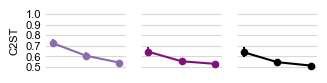

In [117]:
results_subset = all_results.query("task == 'two_moons'")
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig = fig_metric_mpl(results_subset, metric="C2ST", task_name="Two Moons", title=False, xlabel=False)
    plt.savefig("../svg/panel_d_truncated_apt.svg", transparent=True)

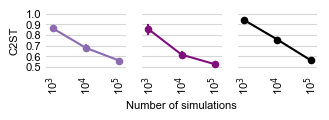

In [118]:
results_subset = all_results.query("task == 'bernoulli_glm'")
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig = fig_metric_mpl(results_subset, metric="C2ST", task_name="Bernoulli GLM", title=False, xlabel=True)
    plt.savefig("../svg/panel_f_truncated_apt.svg", transparent=True)

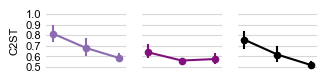

In [119]:
results_subset = all_results.query("task == 'sir'")
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig = fig_metric_mpl(results_subset, metric="C2ST", task_name="SIR", title=False, xlabel=False)
    plt.savefig("../svg/panel_c_truncated_apt.svg", transparent=True)

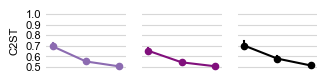

In [120]:
results_subset = all_results.query("task == 'gaussian_linear'")
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig = fig_metric_mpl(results_subset, metric="C2ST", task_name="SIR", title=False, xlabel=False)
    plt.savefig("../svg/panel_a_truncated_apt.svg", transparent=True)

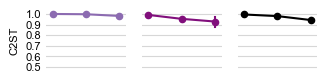

In [121]:
results_subset = all_results.query("task == 'lotka_volterra'")
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig = fig_metric_mpl(results_subset, metric="C2ST", task_name="SIR", title=False, xlabel=False)
    plt.savefig("../svg/panel_e_truncated_apt.svg", transparent=True)

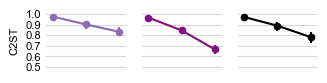

In [122]:
results_subset = all_results.query("task == 'slcp'")
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig = fig_metric_mpl(results_subset, metric="C2ST", task_name="SIR", title=False, xlabel=False)
    plt.savefig("../svg/panel_b_truncated_apt.svg", transparent=True)

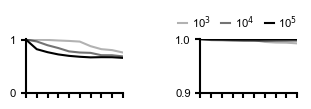

In [123]:
results_subset = all_results.query("task == 'gaussian_linear'")
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig = fig_diagnostic(results_subset, metric="C2ST", task_name="Gaussian Linear", title=True, xlabel=False, legend=True)
    plt.savefig("../svg/panel_a2_truncated_apt.svg", transparent=True)

/home/michael/Documents/tsnpe_collection/paper/paper/utils.py:162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(full)


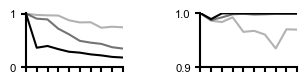

In [124]:
results_subset = all_results.query("task == 'slcp'")
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig = fig_diagnostic(results_subset, metric="C2ST", task_name="SLCP", title=True, xlabel=False)
    plt.savefig("../svg/panel_b2_truncated_apt.svg", transparent=True)

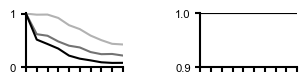

In [125]:
results_subset = all_results.query("task == 'sir'")
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig = fig_diagnostic(results_subset, metric="C2ST", task_name="SLCP", title=True, xlabel=False)
    plt.savefig("../svg/panel_c2_truncated_apt.svg", transparent=True)

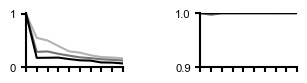

In [126]:
results_subset = all_results.query("task == 'two_moons'")
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig = fig_diagnostic(results_subset, metric="C2ST", task_name="SLCP", title=True, xlabel=False, ylabel=False)
    plt.savefig("../svg/panel_d2_truncated_apt.svg", transparent=True)

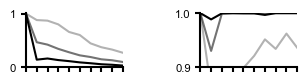

In [127]:
results_subset = all_results.query("task == 'lotka_volterra'")
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig = fig_diagnostic(results_subset, metric="C2ST", task_name="SLCP", title=True, xlabel=False)
    plt.savefig("../svg/panel_e2_truncated_apt.svg", transparent=True)

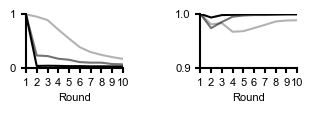

In [128]:
results_subset = all_results.query("task == 'bernoulli_glm'")
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig = fig_diagnostic(results_subset, metric="C2ST", task_name="SLCP", title=True, xlabel=True)
    plt.savefig("../svg/panel_f2_truncated_apt.svg", transparent=True)

In [129]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [131]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

f = Figure("15.7cm", "14.9cm",

    Panel(
          SVG("../svg/panel_a_truncated_apt.svg").scale(svg_scale).move(0, 0),
        Text("Gaussian Linear", 280, -.0, **kwargs_text8pt),
    ).move(-5, 30),
    Panel(
          SVG("../svg/panel_b_truncated_apt.svg").scale(svg_scale).move(0, 0),
        Text("SLCP", 300, -0.0, **kwargs_text8pt),
    ).move(-5,120),
    Panel(
          SVG("../svg/panel_c_truncated_apt.svg").scale(svg_scale).move(0, 0),
        Text("SIR", 303, -0.0, **kwargs_text8pt),
    ).move(-5, 205),
    Panel(
          SVG("../svg/panel_d_truncated_apt.svg").scale(svg_scale).move(0, 0),
        Text("Two Moons", 285, -0.0, **kwargs_text8pt),
    ).move(-5, 290),
    Panel(
          SVG("../svg/panel_e_truncated_apt.svg").scale(svg_scale).move(0, 0),
        Text("Lotka Volterra", 281, -0.0, **kwargs_text8pt),
    ).move(-5, 375),
    Panel(
          SVG("../svg/panel_f_truncated_apt.svg").scale(svg_scale).move(0, 0),
        Text("Bernoulli GLM", 280, -0.0, **kwargs_text8pt),
    ).move(-5, 460),

    Text("NPE", 60, 10.0, **kwargs_text8pt),
    Text("APT", 147, 10.0, **kwargs_text8pt),
    Text("Truncated APT", 211, 10.0, **kwargs_text8pt),
    Text("Acceptance rate", 340, 10.0, **kwargs_text8pt),
    Text("GT samples in support", 480, 10.0, **kwargs_text8pt),
    
    Panel(
          SVG("../svg/panel_a2_truncated_apt.svg").scale(svg_scale).move(0, 0),
    ).move(314, 5),
    Panel(
          SVG("../svg/panel_b2_truncated_apt.svg").scale(svg_scale).move(0, 0),
    ).move(314, 120),
    Panel(
          SVG("../svg/panel_c2_truncated_apt.svg").scale(svg_scale).move(0, 0),
    ).move(314, 205),
    Panel(
          SVG("../svg/panel_d2_truncated_apt.svg").scale(svg_scale).move(0, 0),
    ).move(314, 290),
    Panel(
          SVG("../svg/panel_e2_truncated_apt.svg").scale(svg_scale).move(0, 0),
    ).move(314, 375),
    Panel(
          SVG("../svg/panel_f2_truncated_apt.svg").scale(svg_scale).move(0, 0),
    ).move(314, 460),
)

f.save("../fig/fig4_truncated_apt.svg")
svg('../fig/fig4_truncated_apt.svg')